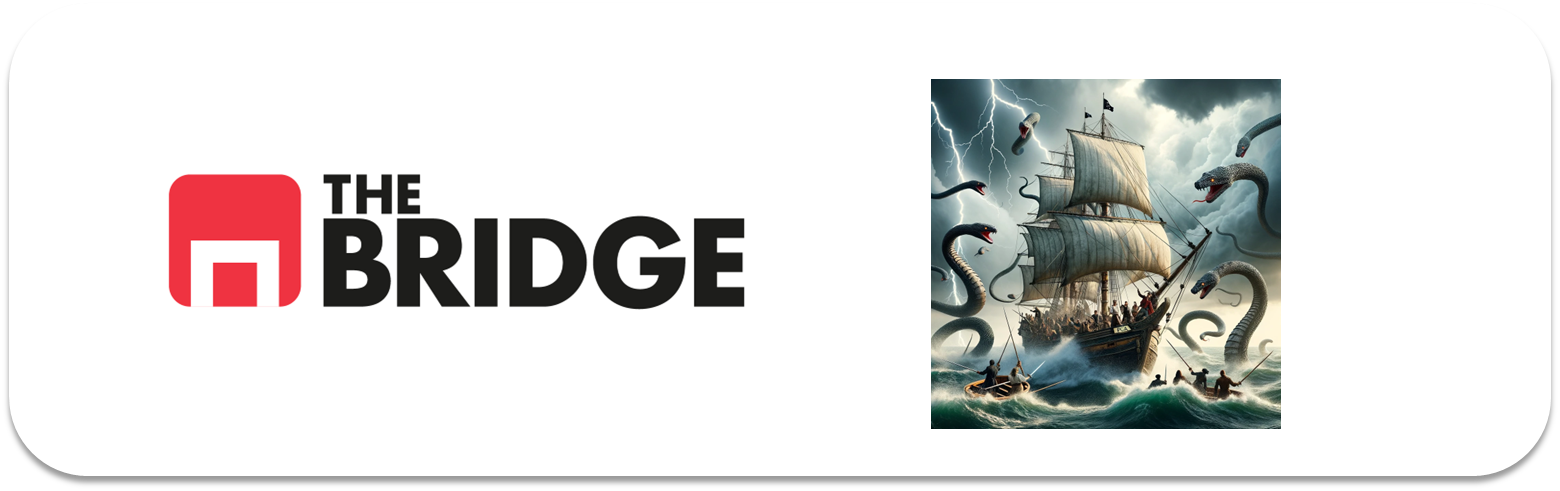

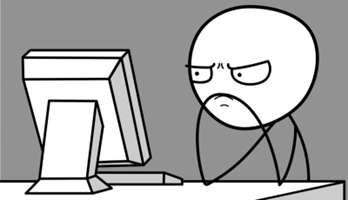

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [89]:
import pandas as pd
import numpy as np
import importlib 
import Toolbox_datascience as tds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [90]:
importlib.reload(tds)

<module 'Toolbox_datascience' from 'c:\\Users\\rodri\\Git_Repositories\\ONLINE_DS_THEBRIDGE_ROD\\Sprint_14\\Unidad_01\\Ejercicios_Workout\\Toolbox_datascience.py'>

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [91]:
df = pd.read_csv("./data/nutrition.csv")
df.head()


ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1       0.85  81.11  ...        0.0075      0.002625          0.026154   
2       0.28  99.48  ...        0.0000      0.000188          0.003846   
3      21.40  28.74  ...        0.0900      0.063500          0.293846   
4      23.24  29.68  ...        0.0500      0.007375          0.270000   

   Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  \
0       0.004167       0.020000      0.000000         0.004762   
1       0.004167       0.020000      0.000018         0.004762   
2       0.000833       0.003333      0.000001         0.000000   
3       0.024167       0.440000      0.000044         0.054762   
4       0.011667       0.561667      0.000027         0.057143   

   Phosphorus_USRDA  Selenium_USRDA  Zinc_USRDA  
0          0.034286        0.018182    0.008182  
1          0.032857        0.018182    0.004545  
2          0.004286        0.000000    0.000909  
3          0.552857        0.263636    0.241818  
4          0.644286        0.263636    0.236364  

[5 rows x 45 columns]

In [92]:
df.info(max_cols=48)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_plots = int(np.ceil(len(unique_categories) / size_group))
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_plots = int(np.ceil(len(unique_categories) / size_group))
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_plots = int(np.ceil(len(unique_categories) / size_group))
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_pl

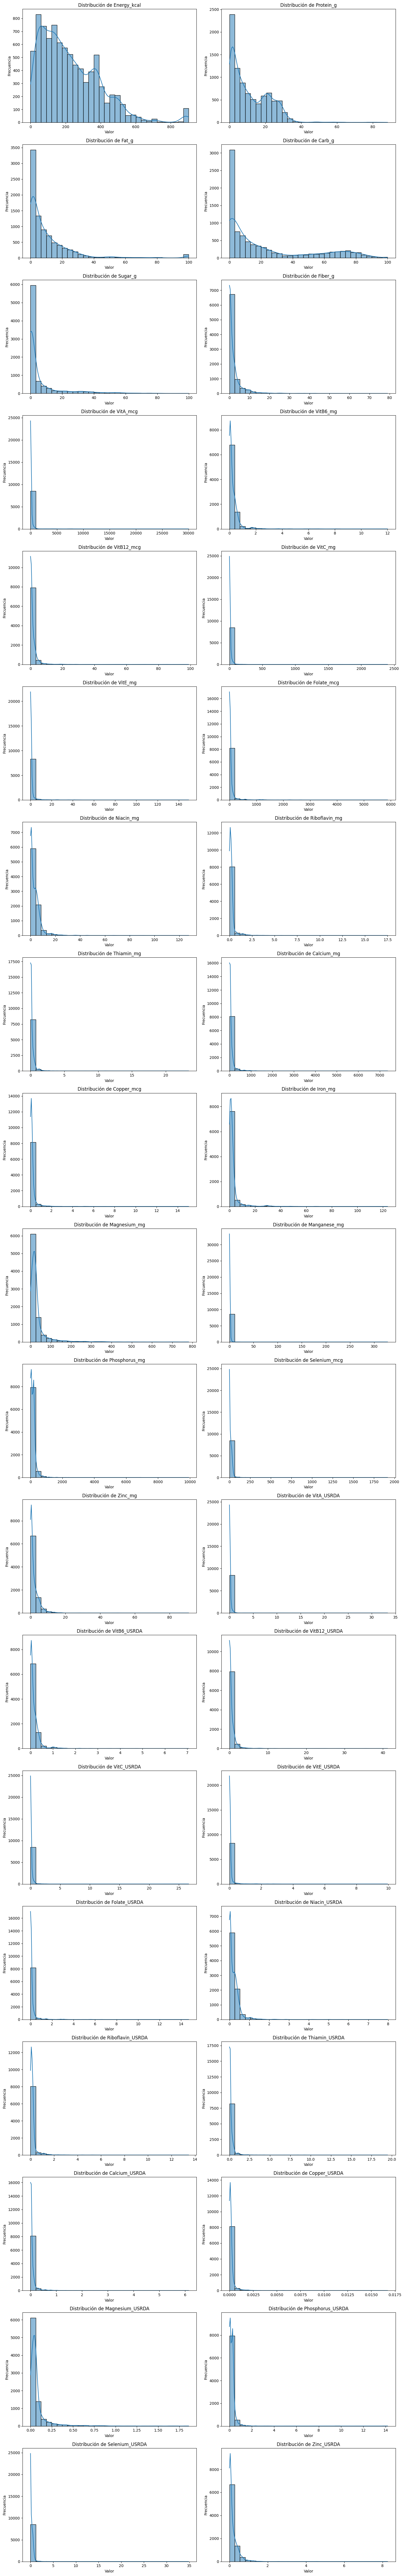

In [93]:
features_num = df.select_dtypes(include=['Float64']).columns.to_list()
tds.pinta_distribucion_numericas(df,features_num);

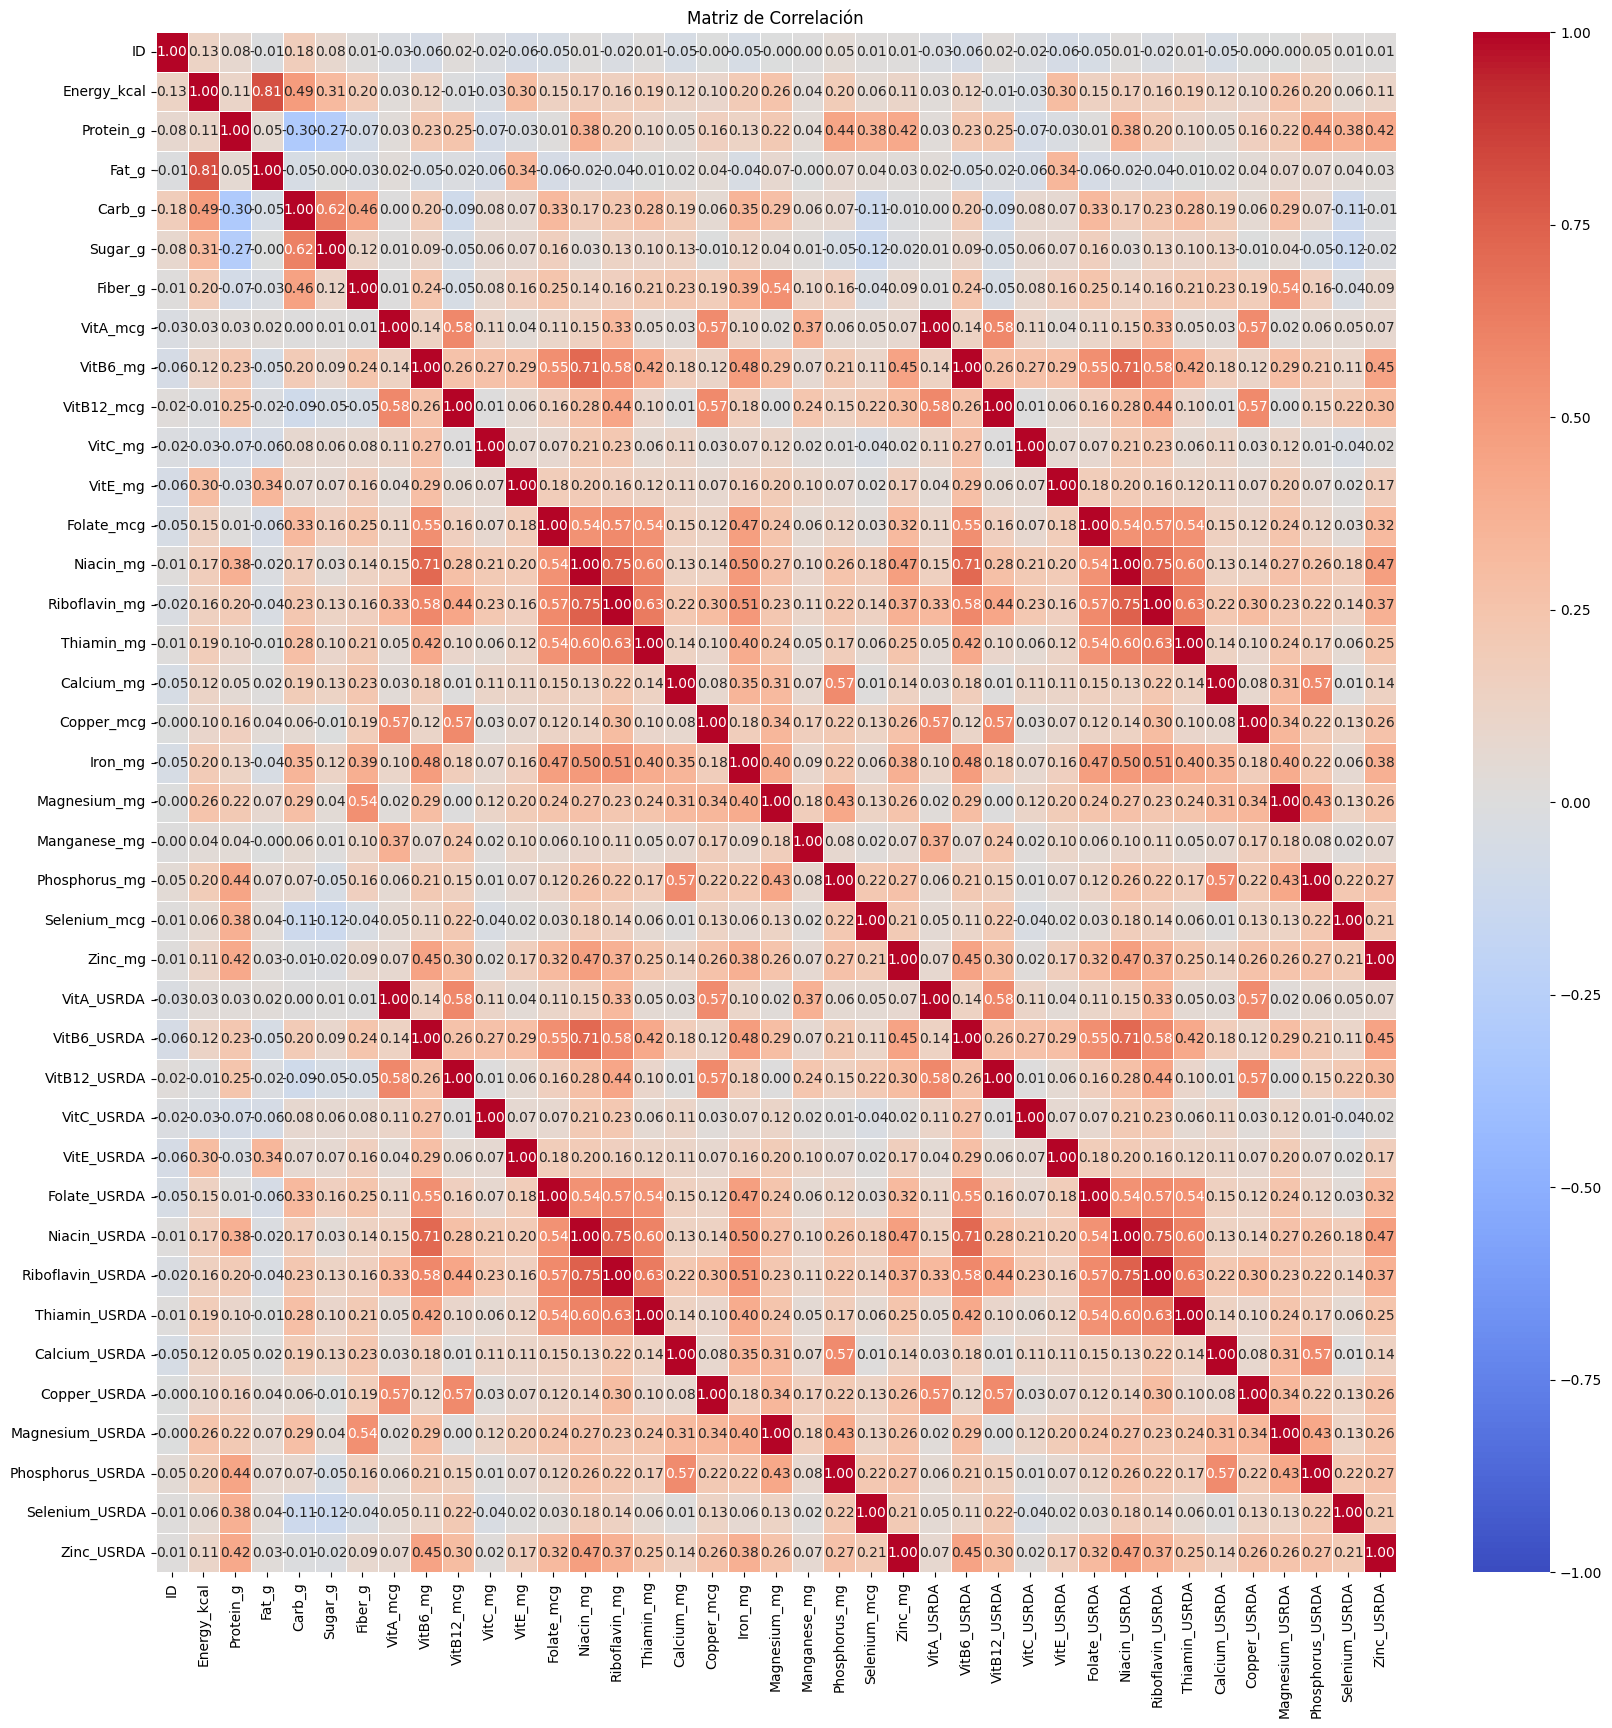

In [94]:
tds.plot_correlation_heatmap(df)

In [95]:
df.Copper_USRDA.value_counts()

Copper_USRDA
0.000000    1469
0.000111     117
0.000089      86
0.000033      85
0.000088      72
            ... 
0.001313       1
0.001024       1
0.002778       1
0.002741       1
0.000949       1
Name: count, Length: 803, dtype: int64

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [96]:
df.drop(columns=df.filter(regex='_USRDA$').columns, inplace=True)

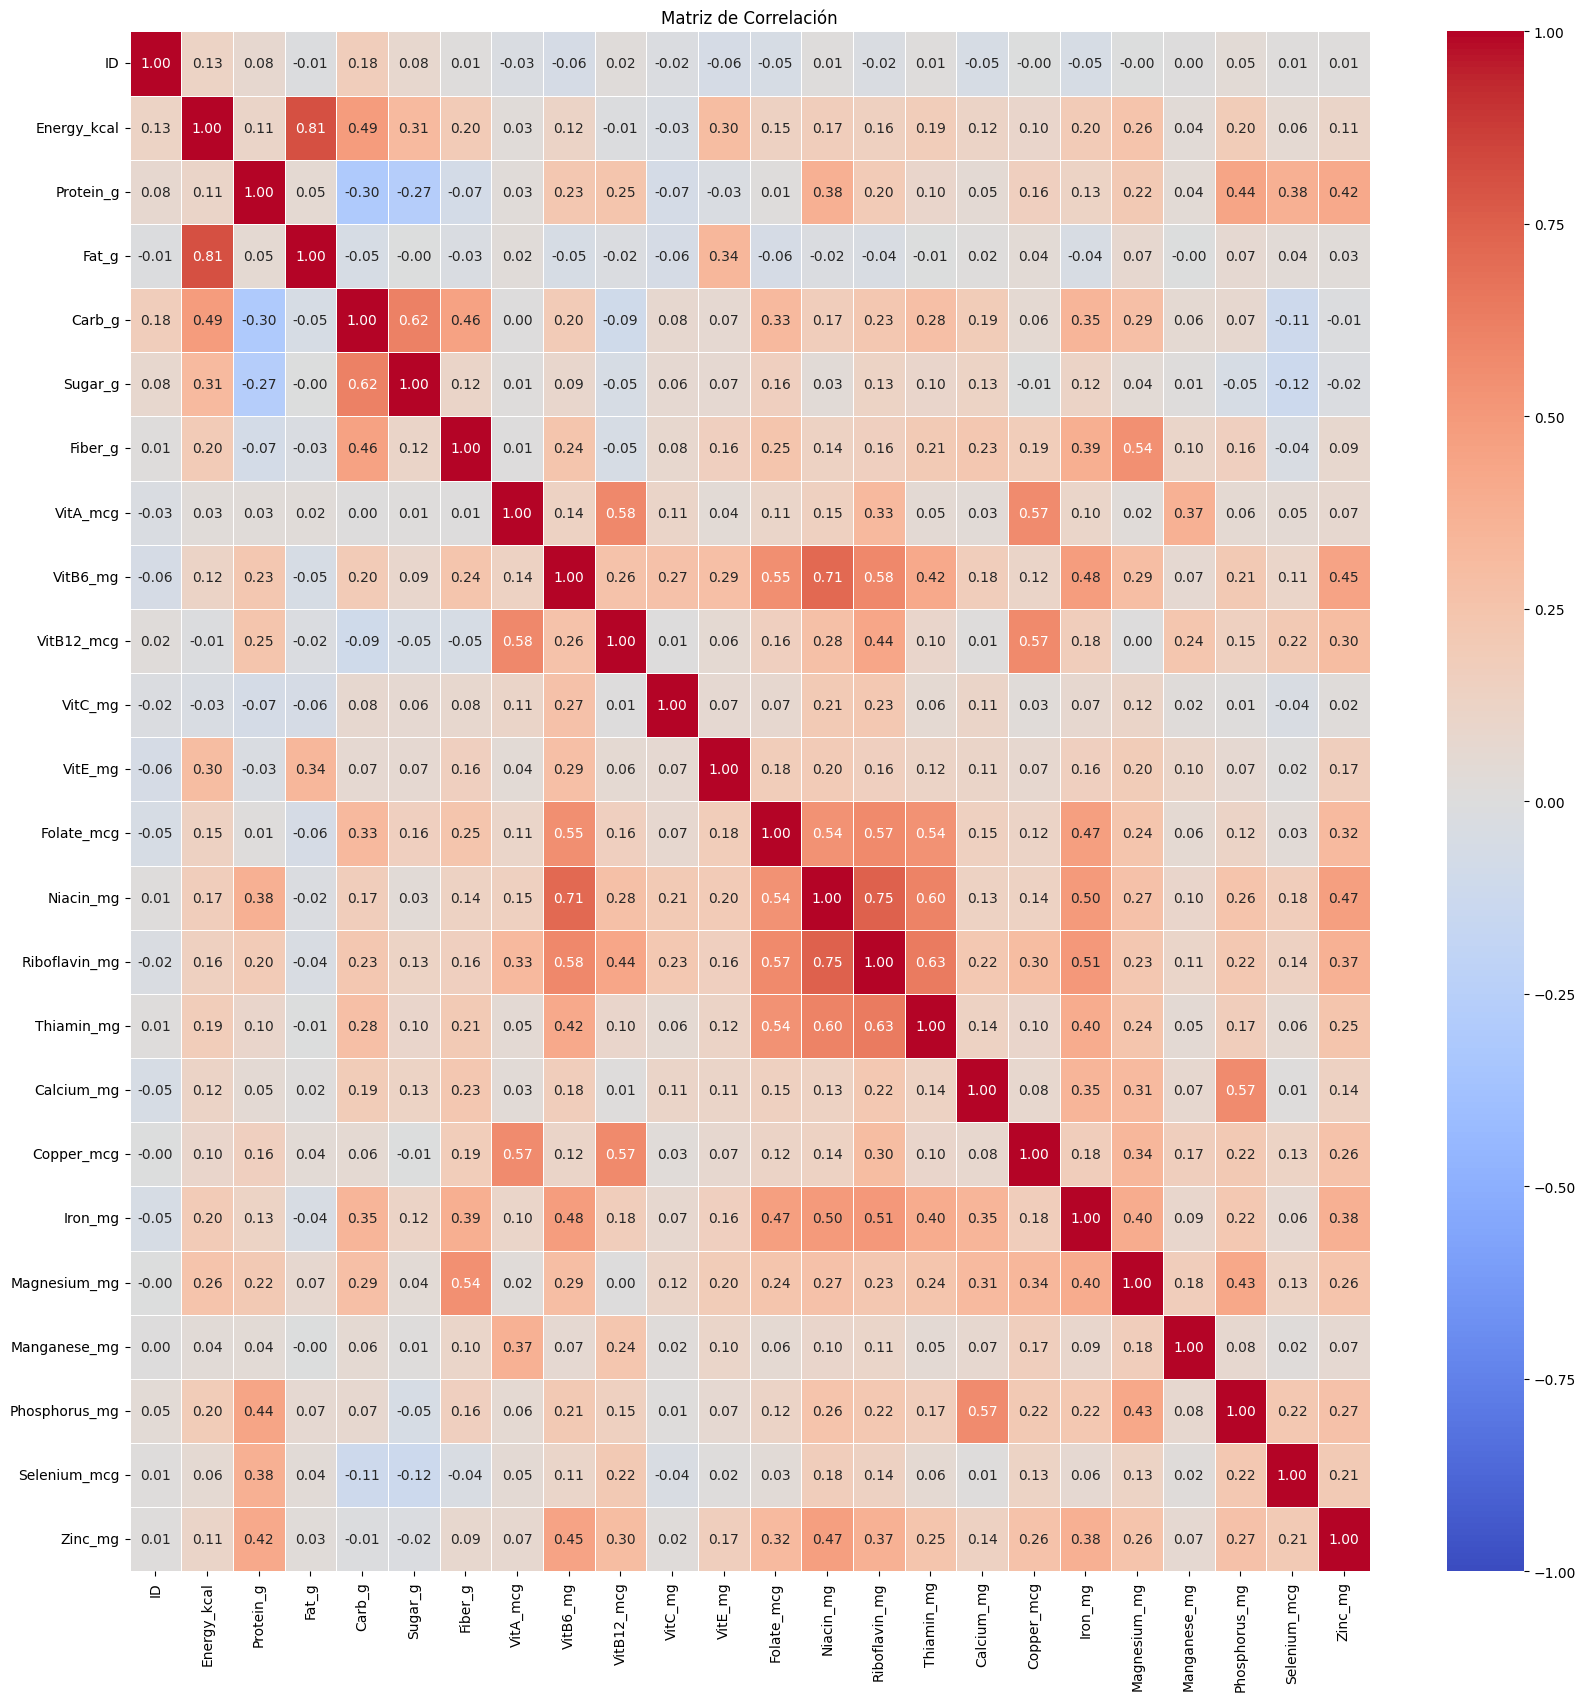

In [97]:
tds.plot_correlation_heatmap(df)

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8618 non-null   int64  
 1   FoodGroup       8618 non-null   object 
 2   ShortDescrip    8618 non-null   object 
 3   Descrip         8618 non-null   object 
 4   CommonName      1063 non-null   object 
 5   MfgName         1560 non-null   object 
 6   ScientificName  732 non-null    object 
 7   Energy_kcal     8618 non-null   float64
 8   Protein_g       8618 non-null   float64
 9   Fat_g           8618 non-null   float64
 10  Carb_g          8618 non-null   float64
 11  Sugar_g         8618 non-null   float64
 12  Fiber_g         8618 non-null   float64
 13  VitA_mcg        8618 non-null   float64
 14  VitB6_mg        8618 non-null   float64
 15  VitB12_mcg      8618 non-null   float64
 16  VitC_mg         8618 non-null   float64
 17  VitE_mg         8618 non-null   f

In [99]:
features_cat= df.select_dtypes(include=['object']).columns.to_list()
df.drop(columns=features_cat, inplace=True)

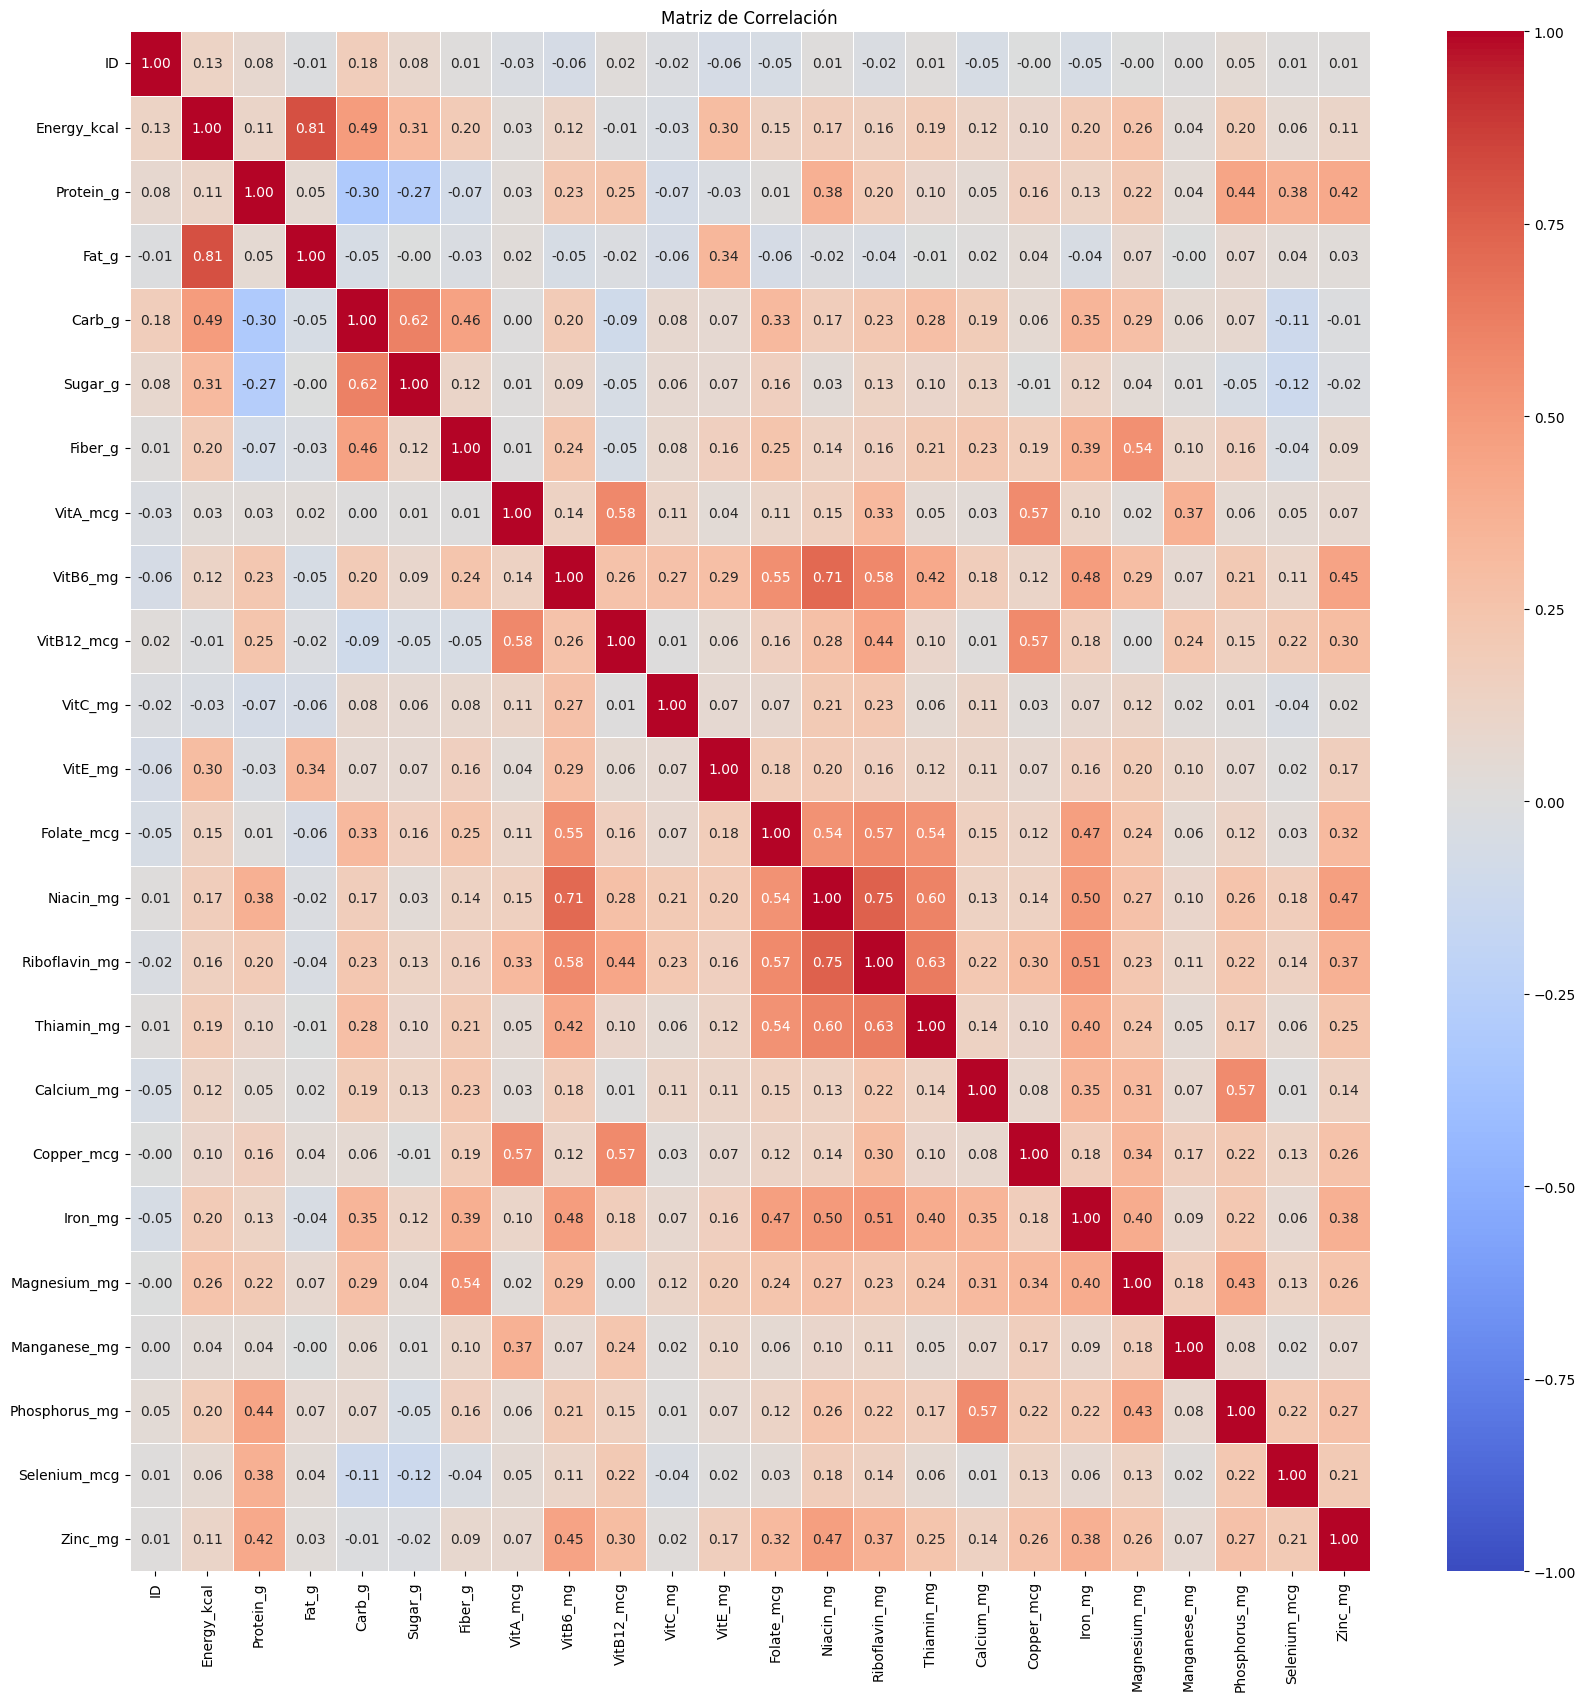

In [100]:
tds.plot_correlation_heatmap(df)

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


In [101]:
df

ID  Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  \
0      1001        717.0       0.85  81.11    0.06     0.06      0.0   
1      1002        717.0       0.85  81.11    0.06     0.06      0.0   
2      1003        876.0       0.28  99.48    0.00     0.00      0.0   
3      1004        353.0      21.40  28.74    2.34     0.50      0.0   
4      1005        371.0      23.24  29.68    2.79     0.51      0.0   
...     ...          ...        ...    ...     ...      ...      ...   
8613  83110        305.0      18.50  25.10    0.00     0.00      0.0   
8614  90240        111.0      20.54   0.84    5.41     0.00      0.0   
8615  90480        269.0       0.00   0.00   73.14    73.20      0.0   
8616  90560         90.0      16.10   1.40    2.00     0.00      0.0   
8617  93600         89.0      19.80   0.50    0.00     0.00      0.0   

      VitA_mcg  VitB6_mg  VitB12_mcg  ...  Riboflavin_mg  Thiamin_mg  \
0        684.0     0.003        0.17  ...          0.034       0.005   
1        684.0     0.003        0.13  ...          0.034       0.005   
2        840.0     0.001        0.01  ...          0.005       0.001   
3        198.0     0.166        1.22  ...          0.382       0.029   
4        292.0     0.065        1.26  ...          0.351       0.014   
...        ...       ...         ...  ...            ...         ...   
8613      47.0     0.410       12.00  ...          0.190       0.020   
8614       2.0     0.112        2.15  ...          0.024       0.012   
8615       0.0     0.000        0.00  ...          0.060       0.130   
8616      30.0     0.130        0.50  ...          0.120       0.010   
8617      30.0     0.120        1.00  ...          0.150       0.120   

      Calcium_mg  Copper_mcg  Iron_mg  Magnesium_mg  Manganese_mg  \
0           24.0       0.000     0.02           2.0         0.000   
1           24.0       0.016     0.16           2.0         0.004   
2            4.0       0.001     0.00           0.0         0.000   
3          528.0       0.040     0.31          23.0         0.009   
4          674.0       0.024     0.43          24.0         0.012   
...          ...         ...      ...           ...           ...   
8613        66.0       0.100     1.40          60.0         0.000   
8614        10.0       0.033     0.58          37.0         0.029   
8615        13.0       0.020     3.60          10.0         0.000   
8616        10.0       0.400     3.50         250.0         0.000   
8617       118.0       0.250     1.40          20.0         0.000   

      Phosphorus_mg  Selenium_mcg  Zinc_mg  
0              24.0           1.0     0.09  
1              23.0           1.0     0.05  
2               3.0           0.0     0.01  
3             387.0          14.5     2.66  
4             451.0          14.5     2.60  
...             ...           ...      ...  
8613          254.0          73.4     1.10  
8614          426.0          21.7     1.55  
8615            8.0           0.7     0.19  
8616          272.0          27.4     1.00  
8617          180.0          16.8     1.00  

[8618 rows x 24 columns]

In [102]:
features_num= df.select_dtypes(include=['float64']).columns.to_list()
df_trs=tds.log_transform(df, features_num)
df_trs

ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  Fiber_g  \
0      1001     6.576470   0.615186  4.408060  0.058269  0.058269      0.0   
1      1002     6.576470   0.615186  4.408060  0.058269  0.058269      0.0   
2      1003     6.776507   0.246860  4.609959  0.000000  0.000000      0.0   
3      1004     5.869297   3.109061  3.392493  1.205971  0.405465      0.0   
4      1005     5.918894   3.188004  3.423611  1.332366  0.412110      0.0   
...     ...          ...        ...       ...       ...       ...      ...   
8613  83110     5.723585   2.970414  3.261935  0.000000  0.000000      0.0   
8614  90240     4.718499   3.069912  0.609766  1.857859  0.000000      0.0   
8615  90480     5.598422   0.000000  0.000000  4.305955  4.306764      0.0   
8616  90560     4.510860   2.839078  0.875469  1.098612  0.000000      0.0   
8617  93600     4.499810   3.034953  0.405465  0.000000  0.000000      0.0   

      VitA_mcg  VitB6_mg  VitB12_mcg  ...  Riboflavin_mg  Thiamin_mg  \
0     6.529419  0.002996    0.157004  ...       0.033435    0.004988   
1     6.529419  0.002996    0.122218  ...       0.033435    0.004988   
2     6.734592  0.001000    0.009950  ...       0.004988    0.001000   
3     5.293305  0.153579    0.797507  ...       0.323532    0.028587   
4     5.680173  0.062975    0.815365  ...       0.300845    0.013903   
...        ...       ...         ...  ...            ...         ...   
8613  3.871201  0.343590    2.564949  ...       0.173953    0.019803   
8614  1.098612  0.106160    1.147402  ...       0.023717    0.011929   
8615  0.000000  0.000000    0.000000  ...       0.058269    0.122218   
8616  3.433987  0.122218    0.405465  ...       0.113329    0.009950   
8617  3.433987  0.113329    0.693147  ...       0.139762    0.113329   

      Calcium_mg  Copper_mcg   Iron_mg  Magnesium_mg  Manganese_mg  \
0       3.218876    0.000000  0.019803      1.098612      0.000000   
1       3.218876    0.015873  0.148420      1.098612      0.003992   
2       1.609438    0.001000  0.000000      0.000000      0.000000   
3       6.270988    0.039221  0.270027      3.178054      0.008960   
4       6.514713    0.023717  0.357674      3.218876      0.011929   
...          ...         ...       ...           ...           ...   
8613    4.204693    0.095310  0.875469      4.110874      0.000000   
8614    2.397895    0.032467  0.457425      3.637586      0.028587   
8615    2.639057    0.019803  1.526056      2.397895      0.000000   
8616    2.397895    0.336472  1.504077      5.525453      0.000000   
8617    4.779123    0.223144  0.875469      3.044522      0.000000   

      Phosphorus_mg  Selenium_mcg   Zinc_mg  
0          3.218876      0.693147  0.086178  
1          3.178054      0.693147  0.048790  
2          1.386294      0.000000  0.009950  
3          5.961005      2.740840  1.297463  
4          6.113682      2.740840  1.280934  
...             ...           ...       ...  
8613       5.541264      4.309456  0.741937  
8614       6.056784      3.122365  0.936093  
8615       2.197225      0.530628  0.173953  
8616       5.609472      3.346389  0.693147  
8617       5.198497      2.879198  0.693147  

[8618 rows x 24 columns]

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_plots = int(np.ceil(len(unique_categories) / size_group))
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_plots = int(np.ceil(len(unique_categories) / size_group))
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_plots = int(np.ceil(len(unique_categories) / size_group))
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_14\Unidad_01\Ejercicios_Workout\Toolbox_datascience.py:455: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  num_pl

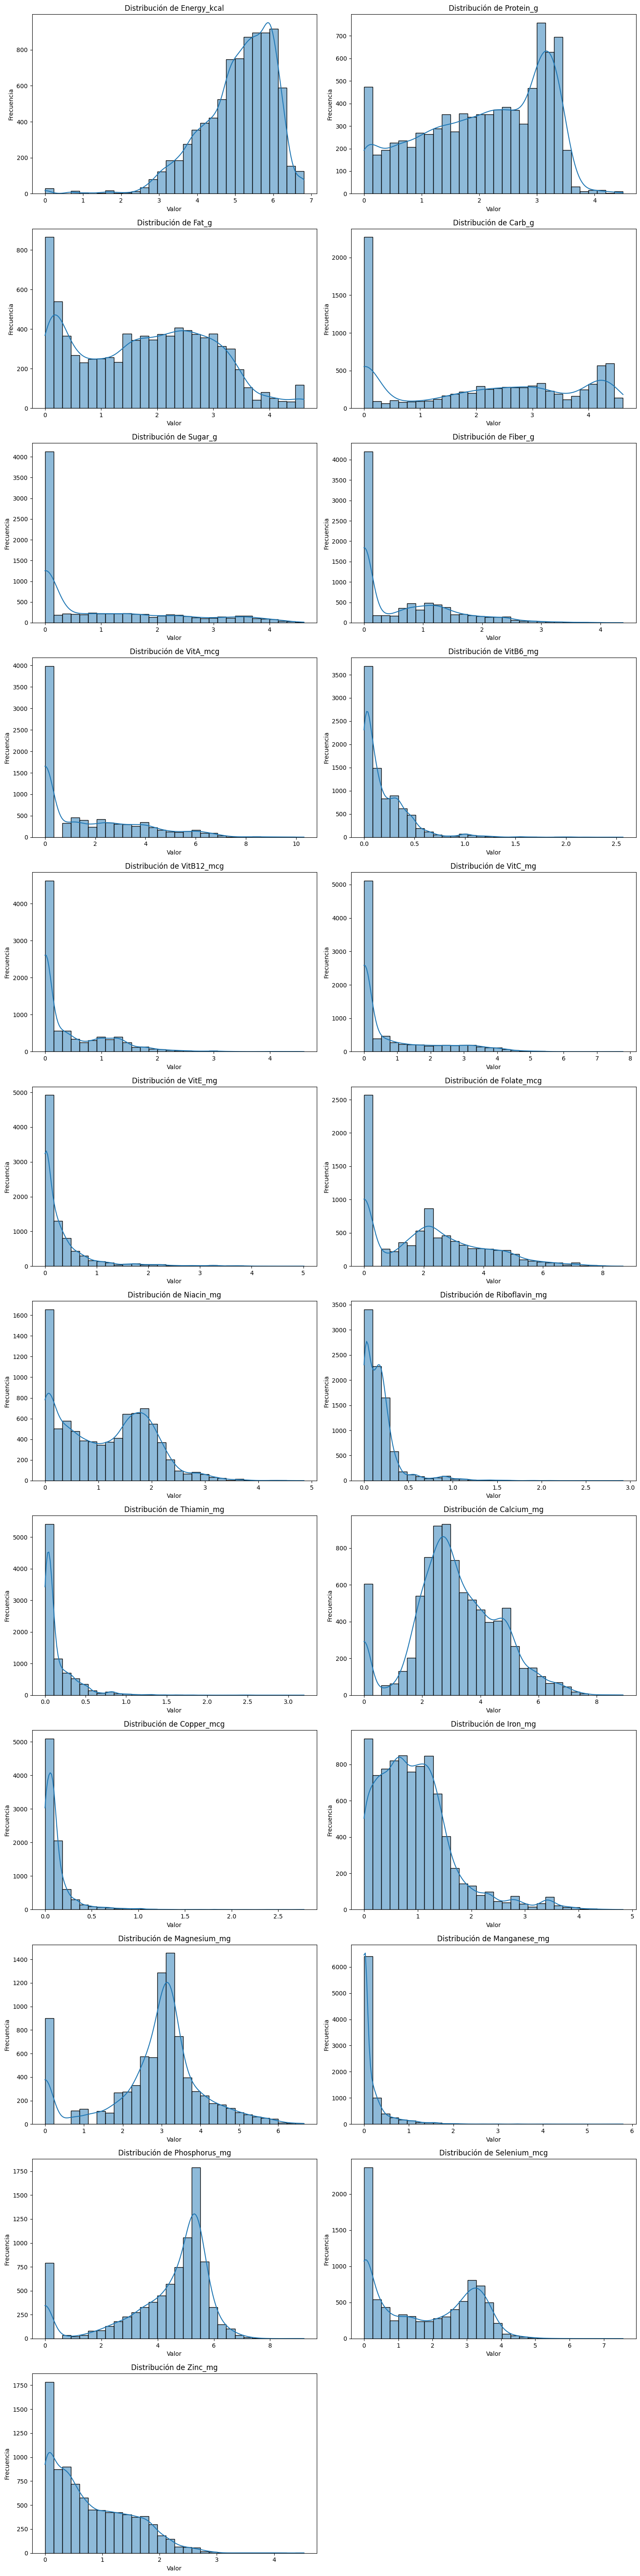

In [103]:

tds.pinta_distribucion_numericas(df_trs,features_num);

In [104]:
df_trs.describe()

ID  Energy_kcal    Protein_g        Fat_g       Carb_g  \
count   8618.000000  8618.000000  8618.000000  8618.000000  8618.000000   
mean   15467.757368     5.075155     2.073285     1.783379     2.118534   
std     9221.428766     0.974674     1.056886     1.181014     1.610507   
min     1001.000000     0.000000     0.000000     0.000000     0.000000   
25%     8695.250000     4.543295     1.244155     0.689388     0.039221   
50%    14273.000000     5.257495     2.228400     1.830178     2.297070   
75%    20050.750000     5.820083     3.043450     2.701361     3.523415   
max    93600.000000     6.805723     4.492225     4.615121     4.615121   

           Sugar_g      Fiber_g     VitA_mcg     VitB6_mg   VitB12_mcg  ...  \
count  8618.000000  8618.000000  8618.000000  8618.000000  8618.000000  ...   
mean      1.018775     0.670117     1.698699     0.197749     0.454007  ...   
std       1.278396     0.819444     2.044344     0.240045     0.654592  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.033676     0.000000  ...   
50%       0.314811     0.262364     0.895880     0.113329     0.076961  ...   
75%       1.840550     1.223775     3.091042     0.303801     0.831820  ...   
max       4.613138     4.382027    10.308986     2.564949     4.604070  ...   

       Riboflavin_mg   Thiamin_mg   Calcium_mg   Copper_mcg      Iron_mg  \
count    8618.000000  8618.000000  8618.000000  8618.000000  8618.000000   
mean        0.181921     0.156594     3.153335     0.126583     0.939353   
std         0.216586     0.222113     1.507092     0.202792     0.712336   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.044973     0.029559     2.302585     0.029559     0.425268   
50%         0.139762     0.074643     2.995732     0.076035     0.845868   
75%         0.231112     0.201307     4.143135     0.135186     1.275363   
max         2.917771     3.193558     8.904494     2.775709     4.825109   

       Magnesium_mg  Manganese_mg  Phosphorus_mg  Selenium_mcg      Zinc_mg  
count   8618.000000   8618.000000    8618.000000   8618.000000  8618.000000  
mean       2.809058      0.183168       4.262292      1.698225     0.800092  
std        1.292329      0.382983       1.718525      1.434322     0.695503  
min        0.000000      0.000000       0.000000      0.000000     0.000000  
25%        2.397895      0.000000       3.637586      0.095310     0.207014  
50%        3.044522      0.021761       4.897840      1.589235     0.612476  
75%        3.401197      0.200489       5.379897      3.104587     1.308333  
max        6.661855      5.796058       9.202207      7.559038     4.521245  

[8 rows x 24 columns]

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [105]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_trs), columns=df_trs.columns)

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [107]:
from sklearn.decomposition import PCA # Aquí es donde puedes encontrar la PCA

modelo_pca = PCA()
modelo_pca.fit(df_scaled)

PCA()

In [120]:
comp = modelo_pca.components_
print(comp)
n = len (comp)
print(f"\nEl número de PCAs es: {n}")

[[ 2.29681839e-02  1.98673907e-01  2.78231469e-01  1.48488784e-01
   3.32585768e-03 -2.63282337e-02  7.45878489e-02  7.93352341e-02
   2.62966725e-01  2.15067592e-01 -2.49532176e-02  8.04652890e-02
   1.95217507e-01  3.03524352e-01  2.66423111e-01  2.29280134e-01
   1.54069978e-01  1.88093933e-01  2.81853999e-01  2.75524959e-01
   1.38838848e-01  2.95706748e-01  2.47330951e-01  2.98870343e-01]
 [-2.21326389e-02  3.71830844e-03 -2.42566223e-01 -1.51334527e-01
   4.37578083e-01  3.19265079e-01  3.87185174e-01  1.11252361e-01
   8.59590012e-03 -2.36108572e-01  2.57874194e-01  1.24716159e-01
   2.13782534e-01 -1.07026101e-01  7.33178100e-02  1.60998906e-01
   2.04717229e-01  1.37108946e-01  1.24371089e-01  1.13006513e-01
   2.59279401e-01 -6.16607384e-02 -2.24679070e-01 -1.58991614e-01]
 [ 3.10508250e-01  4.84611846e-01  8.22885291e-02  4.22849271e-01
   2.23605213e-01  1.80422487e-01  1.45544059e-01 -2.97683691e-01
  -1.62639695e-01 -1.76647145e-01 -3.82318239e-01  8.31236187e-02
  -2.128

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [126]:
index_list = [f"PC_{i+1}" for i in range(len(comp))]

pd.DataFrame(
    data    = comp, # En components están los autovectores es decir los coeficientes de la PCA
    columns = df_scaled.columns,
    index   = index_list # En ingles pasamos de CP a PC :-) (Principal component)
)

ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  \
PC_1   0.022968     0.198674   0.278231  0.148489  0.003326 -0.026328   
PC_2  -0.022133     0.003718  -0.242566 -0.151335  0.437578  0.319265   
PC_3   0.310508     0.484612   0.082289  0.422849  0.223605  0.180422   
PC_4  -0.021356     0.077341  -0.131271  0.047204  0.040205  0.284611   
PC_5  -0.198190     0.204796  -0.068702  0.390163 -0.089714  0.085364   
PC_6   0.343211    -0.002980   0.102869 -0.067903  0.169427  0.230054   
PC_7   0.811146    -0.143438  -0.068505 -0.115182 -0.055404 -0.000877   
PC_8  -0.095345     0.072439   0.009322  0.084803  0.053662  0.094067   
PC_9  -0.158402     0.020564   0.061233 -0.030009 -0.026953  0.437793   
PC_10  0.092405    -0.078296   0.120221  0.155955 -0.173234 -0.440346   
PC_11  0.047935     0.288819   0.021283  0.314893  0.037975 -0.233612   
PC_12  0.099823    -0.021469   0.005068  0.020287 -0.020125 -0.120079   
PC_13  0.053499    -0.092334  -0.019876 -0.025810 -0.019028  0.043873   
PC_14  0.053389     0.136967  -0.018902  0.040539  0.024846  0.144571   
PC_15 -0.036482    -0.155260  -0.057839 -0.074280 -0.058017  0.123269   
PC_16 -0.046565    -0.085246   0.292999 -0.102076 -0.069522  0.157530   
PC_17 -0.102077     0.045259   0.029480 -0.041631  0.095625 -0.171093   
PC_18  0.026922    -0.171260  -0.054711  0.166438 -0.146269  0.108245   
PC_19 -0.059580     0.311135  -0.232877 -0.329396  0.381399 -0.298463   
PC_20  0.058789     0.075177  -0.250653 -0.001798  0.068250 -0.176178   
PC_21 -0.003503     0.259359   0.641371 -0.386816  0.010927  0.008706   
PC_22 -0.045849     0.108143  -0.000126 -0.199545  0.300471 -0.158089   
PC_23  0.014324     0.161529   0.225948 -0.092026 -0.133293  0.046433   
PC_24 -0.049144    -0.513747   0.357361  0.343267  0.619355 -0.095023   

        Fiber_g  VitA_mcg  VitB6_mg  VitB12_mcg  ...  Riboflavin_mg  \
PC_1   0.074588  0.079335  0.262967    0.215068  ...       0.266423   
PC_2   0.387185  0.111252  0.008596   -0.236109  ...       0.073318   
PC_3   0.145544 -0.297684 -0.162640   -0.176647  ...      -0.098895   
PC_4  -0.080215  0.083834  0.309080    0.228327  ...       0.350374   
PC_5  -0.176493  0.482038 -0.079718    0.041544  ...      -0.059132   
PC_6  -0.084213  0.316929 -0.139932    0.020892  ...       0.029988   
PC_7  -0.016006  0.102543  0.040580    0.225153  ...      -0.019718   
PC_8  -0.162422  0.187481 -0.223132    0.257676  ...       0.237482   
PC_9   0.062364 -0.421917  0.081473    0.212542  ...      -0.180411   
PC_10  0.177934  0.038845  0.104408   -0.085867  ...      -0.014092   
PC_11 -0.072988 -0.003126 -0.165595   -0.077506  ...      -0.099458   
PC_12 -0.099246 -0.414546 -0.184050    0.139154  ...       0.079815   
PC_13 -0.374575 -0.274700 -0.198746   -0.225203  ...       0.195060   
PC_14 -0.345761 -0.062629  0.135743    0.019444  ...      -0.000068   
PC_15 -0.338637  0.033513 -0.455298   -0.054267  ...       0.116862   
PC_16  0.169446  0.141972 -0.238405   -0.264997  ...      -0.180516   
PC_17  0.371800 -0.126720 -0.355306    0.447593  ...       0.387602   
PC_18  0.265723  0.131082 -0.191596    0.210379  ...      -0.275016   
PC_19 -0.226587  0.020939  0.126201    0.214222  ...      -0.359591   
PC_20  0.066980  0.031712  0.033018   -0.389587  ...       0.467964   
PC_21 -0.024373  0.067871  0.064767   -0.142011  ...       0.125677   
PC_22  0.025021  0.114557 -0.353612    0.081281  ...      -0.077974   
PC_23 -0.081820  0.048218 -0.087963    0.146919  ...      -0.021952   
PC_24 -0.159596 -0.020829  0.116556    0.050989  ...      -0.009839   

       Thiamin_mg  Calcium_mg  Copper_mcg   Iron_mg  Magnesium_mg  \
PC_1     0.229280    0.154070    0.188094  0.281854      0.275525   
PC_2     0.160999    0.204717    0.137109  0.124371      0.113007   
PC_3     0.052255   -0.091772   -0.040686  0.045061     -0.060764   
PC_4     0.307245   -0.209488   -0.270490  0.123380     -0.322005   
PC_5    -0.201217    0.186632    0.021417 -0.174554     -0.051816 

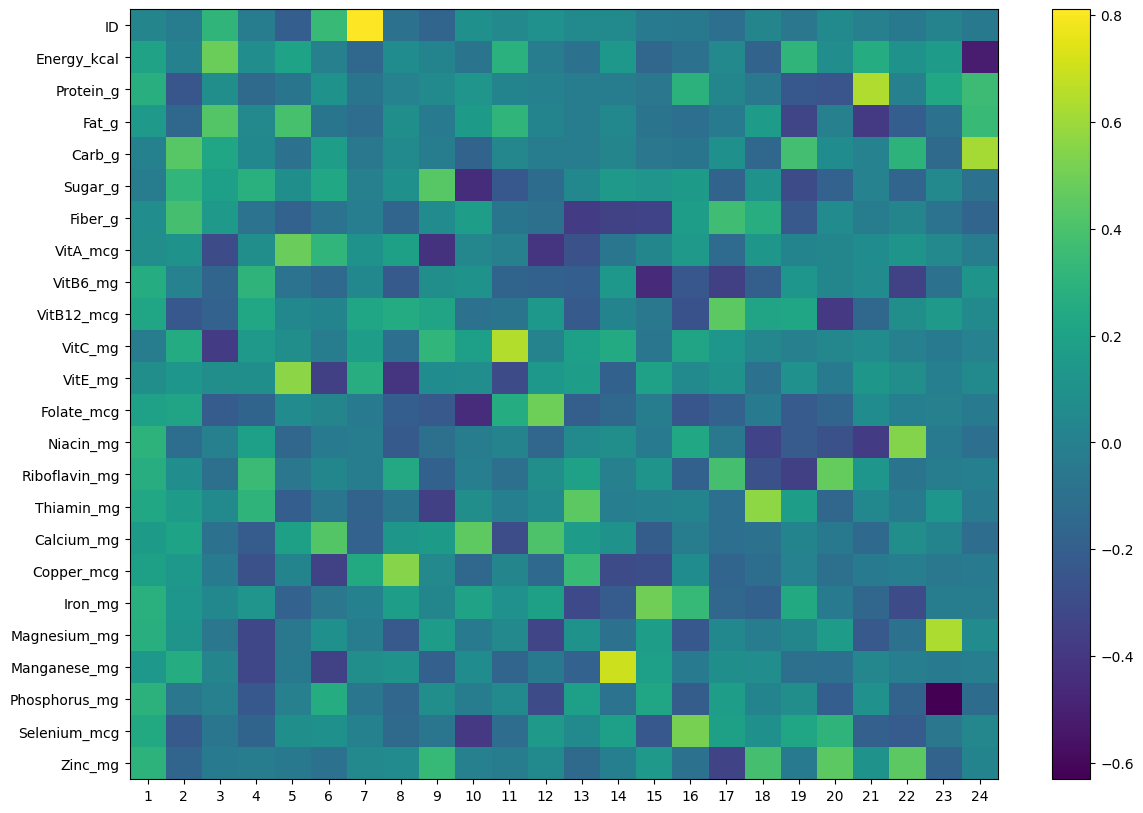

In [127]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(df_scaled.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [128]:
modelo_pca.explained_variance_ratio_

array([0.29962531, 0.15977712, 0.08643201, 0.06817185, 0.05754123,
       0.0442281 , 0.03624754, 0.0294186 , 0.02567994, 0.02420609,
       0.02163207, 0.02086419, 0.01819558, 0.01770158, 0.01368445,
       0.01284834, 0.01219181, 0.01071783, 0.00922464, 0.00883591,
       0.00715797, 0.00659159, 0.00542049, 0.00360576])

In [129]:
sum(modelo_pca.explained_variance_ratio_)

1.0000000000000004

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.29962531 0.15977712 0.08643201 0.06817185 0.05754123 0.0442281
 0.03624754 0.0294186  0.02567994 0.02420609 0.02163207 0.02086419
 0.01819558 0.01770158 0.01368445 0.01284834 0.01219181 0.01071783
 0.00922464 0.00883591 0.00715797 0.00659159 0.00542049 0.00360576]


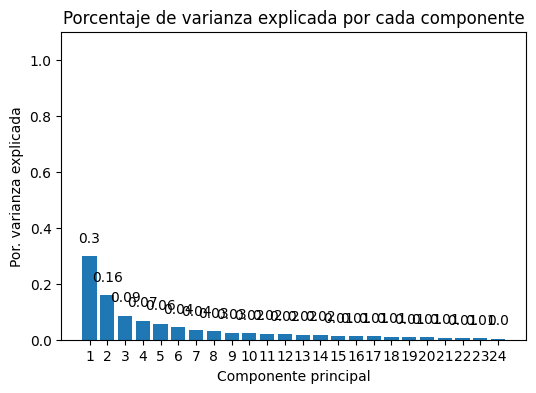

In [131]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_scaled.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29962531 0.45940243 0.54583443 0.61400628 0.67154751 0.71577561
 0.75202315 0.78144174 0.80712169 0.83132778 0.85295985 0.87382404
 0.89201961 0.90972119 0.92340565 0.93625398 0.9484458  0.95916363
 0.96838827 0.97722418 0.98438216 0.99097375 0.99639424 1.        ]


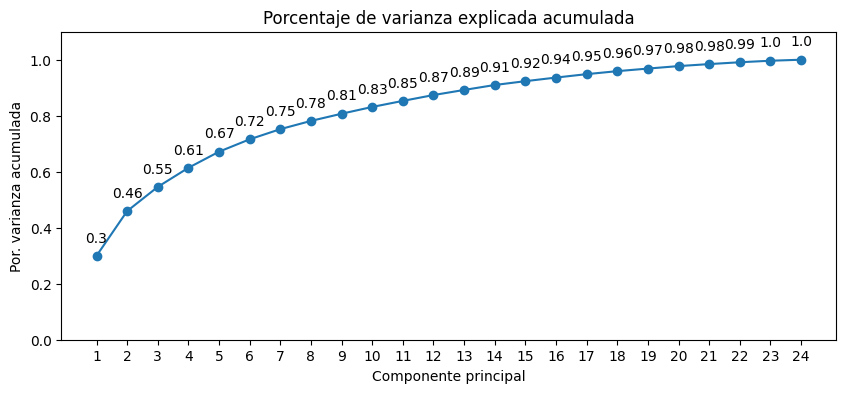

In [133]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(
    np.arange(len(df_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [134]:

num_pc = 8

# 1. Instanciamos el objeto PCA con el número de componentes deseado.
pca = PCA(n_components=num_pc)

# 2. Ajustamos el modelo y transformamos los datos escalados.
#    Esto devuelve un array de forma (n_muestras, num_pc).
principal_components = pca.fit_transform(df_scaled)

# 3. Generamos los nombres de las columnas para el nuevo DataFrame.
#    Usamos una comprensión de listas para crear etiquetas "PC_1", "PC_2", ..., "PC_X".
columnas = [f"PC_{i+1}" for i in range(num_pc)]

# 4. Creamos el nuevo DataFrame con los componentes principales.
#    Usamos el mismo índice que el DataFrame original para mantener la correspondencia de registros.
df_pca = pd.DataFrame(data=principal_components, columns=columnas, index=df_scaled.index)

# 5. Visualizamos las primeras filas del nuevo DataFrame.
print(df_pca.head())


       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -2.174429 -0.935442  0.664982  0.375740  4.477147 -0.580189 -1.164488   
1 -2.141883 -0.876991  0.682006  0.368273  4.447242 -0.624398 -1.156673   
2 -3.302331 -1.108437  1.186043  1.294988  4.574530 -1.568411 -0.861053   
3  1.489032 -1.225293 -0.723462 -0.879837  2.617735  1.616249 -1.907331   
4  1.204082 -1.166212 -0.594838 -1.137984  2.873328  1.873454 -1.927751   

       PC_8  
0  0.399391  
1  0.462308  
2  0.687837  
3  0.719163  
4  1.027125  
